# Notebook to evaluate *ritme* trials tracked with MLflow

This notebook shows how the output from the method `find_best_model_config` of the *ritme* package can be evaluated when the experiments are tracked with MLflow.

The only user inputs required are the path to the MLflow logs (variable `log_folder_location`) and the name of the experiment (variable `experiment_name`).


## Setup

In [1]:
import warnings

import mlflow

from ritme.evaluate_mlflow import (
    barplot_metric,
    parallel_coordinates_plot,
    plot_complexity_vs_metric,
    violinplot_metric,
    plot_metric_history_per_model_type,
    plot_avg_history_per_model_type,
    extract_run_config,
)

warnings.filterwarnings("ignore", category=FutureWarning)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
######## USER INPUTS ########

# path to MLflow logs
log_folder_location = "ritme_refact_logs/mlruns"
experiment_name = "r_local_all_mlflow"
######## END USER INPUTS #####

In [3]:
# extract all trial information
mlflow.set_tracking_uri(log_folder_location)

all_trials = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True
)

print(f"Found {all_trials.shape[0]} trials")

Found 14 trials


## Insights on performance per model type

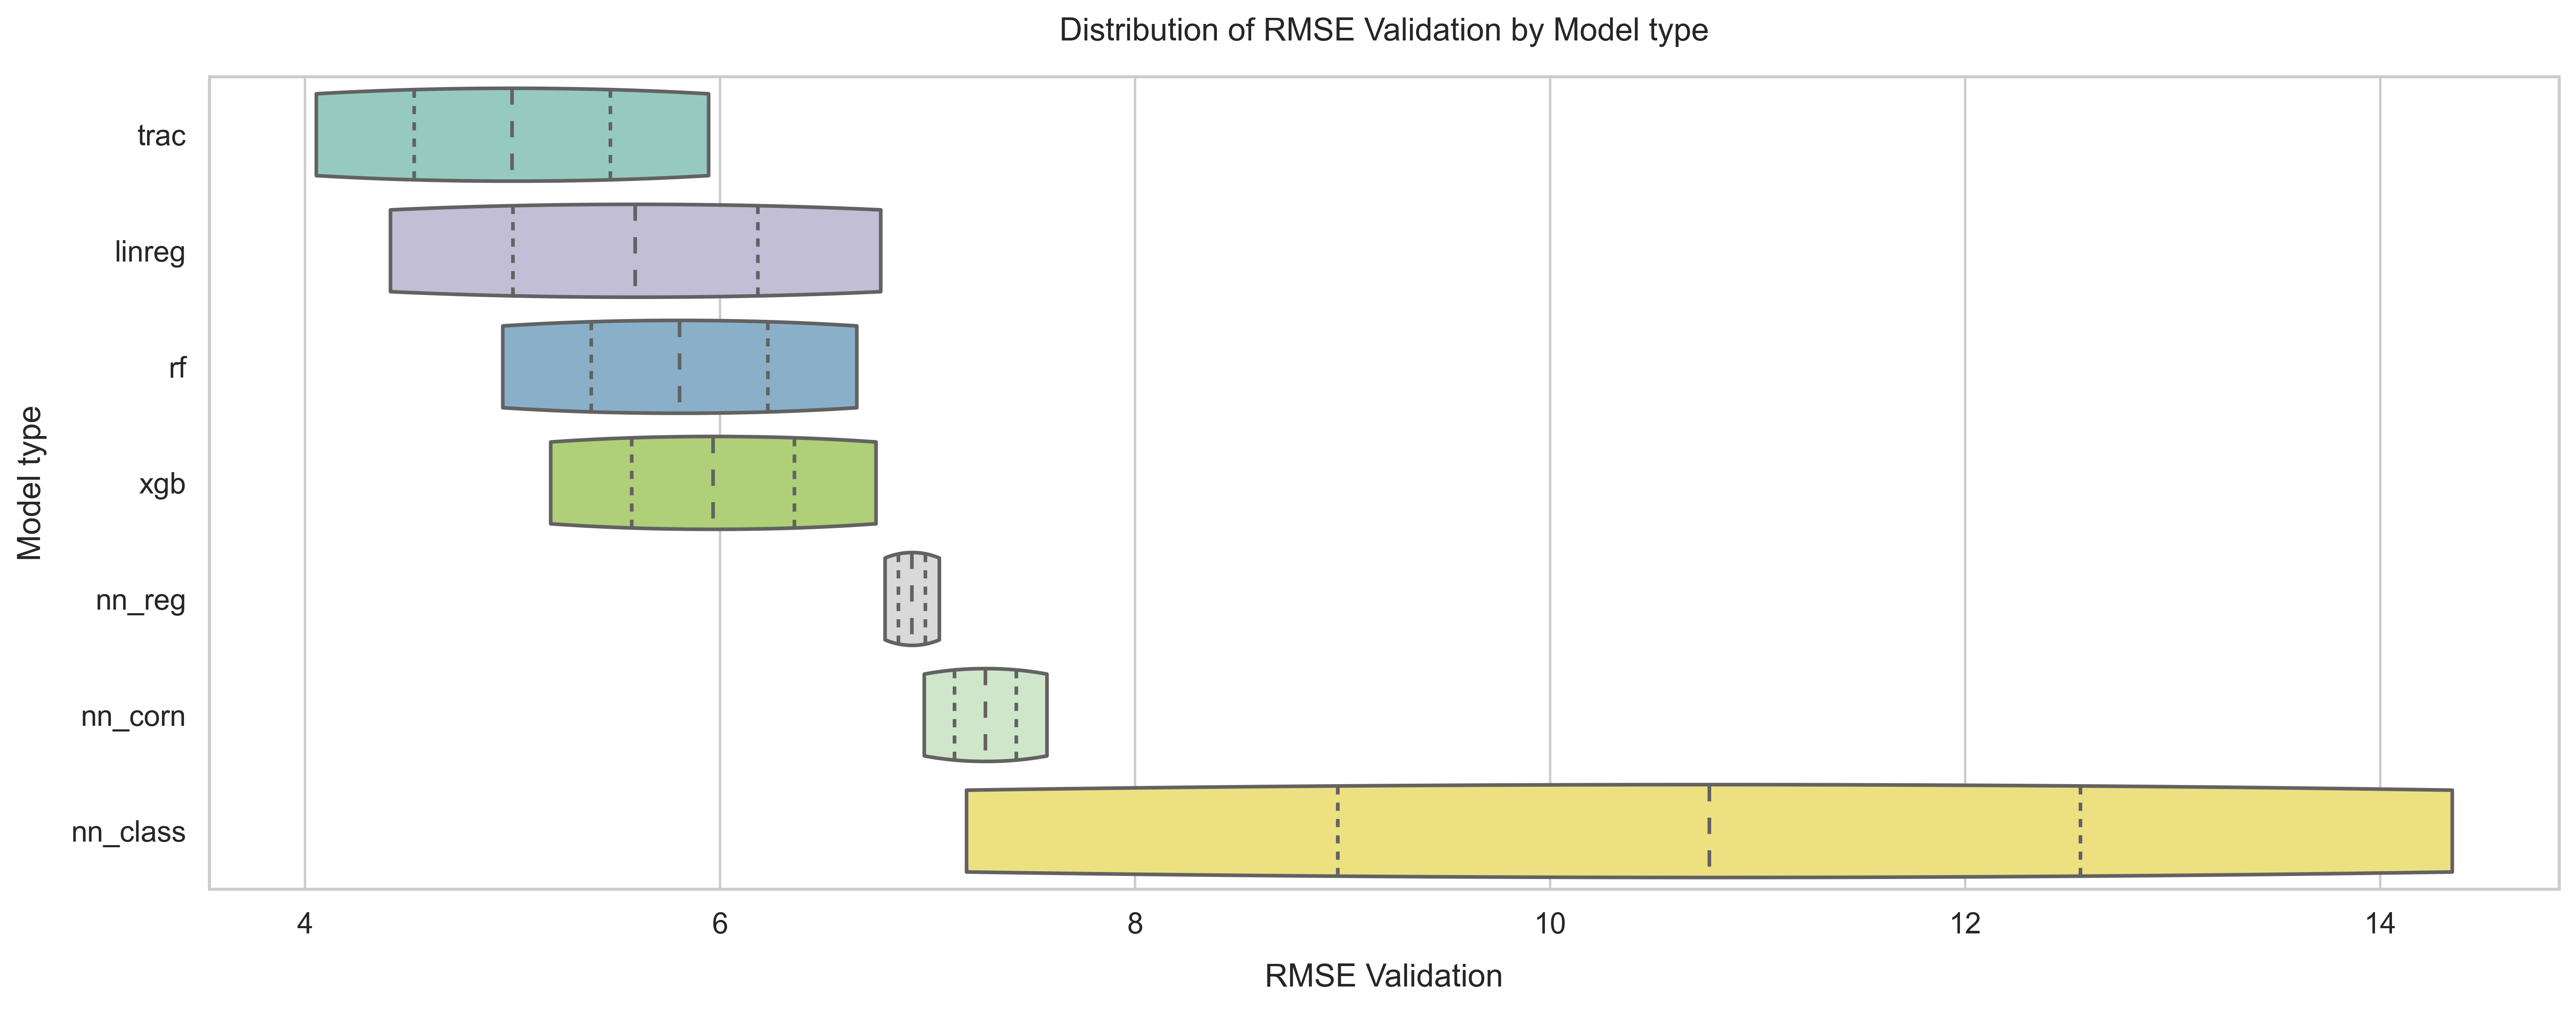

In [4]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
)

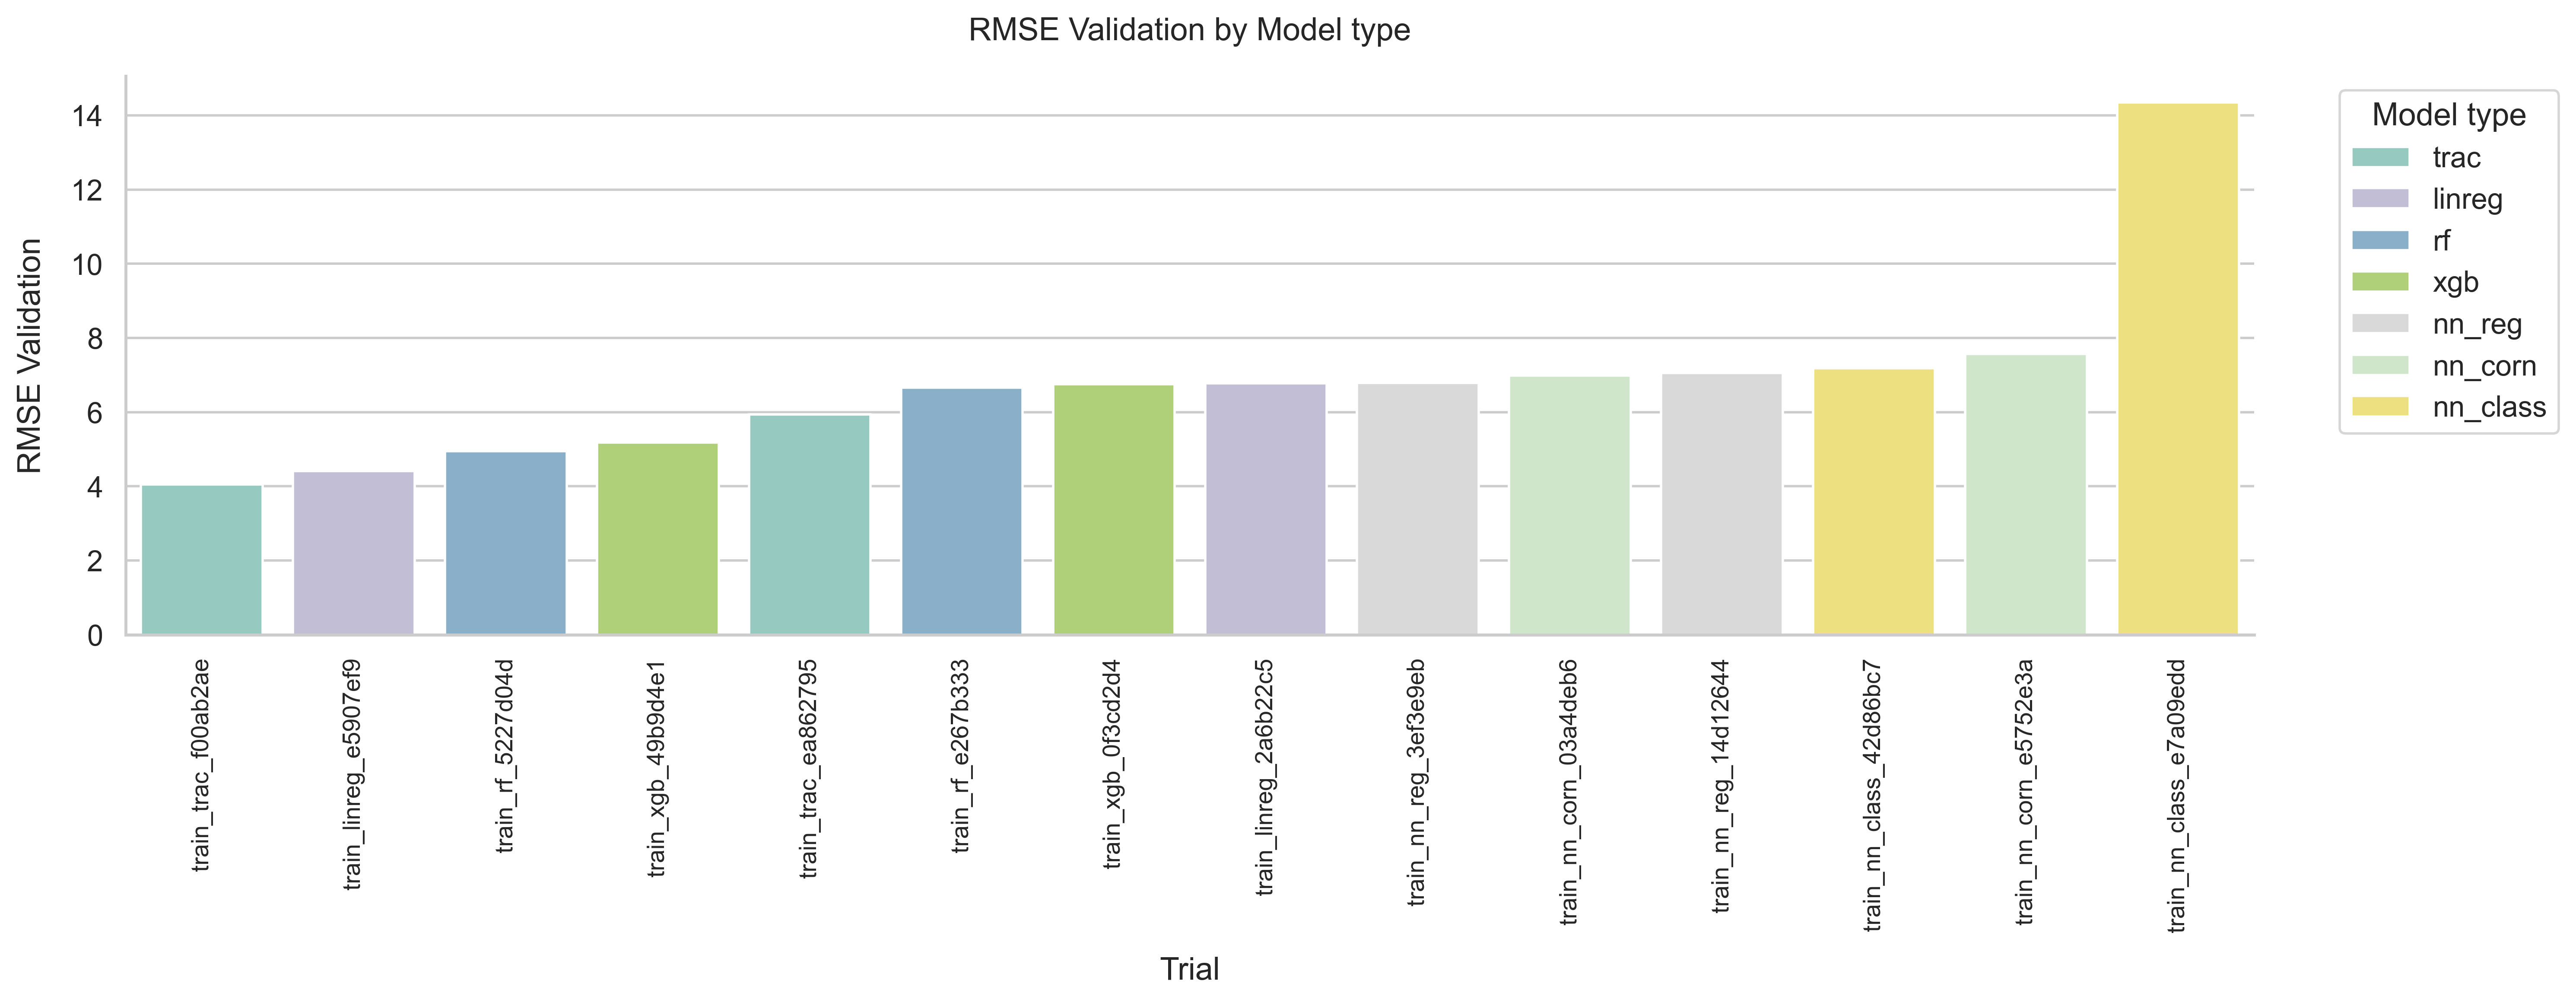

In [5]:
barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

## Model complexity vs. performance

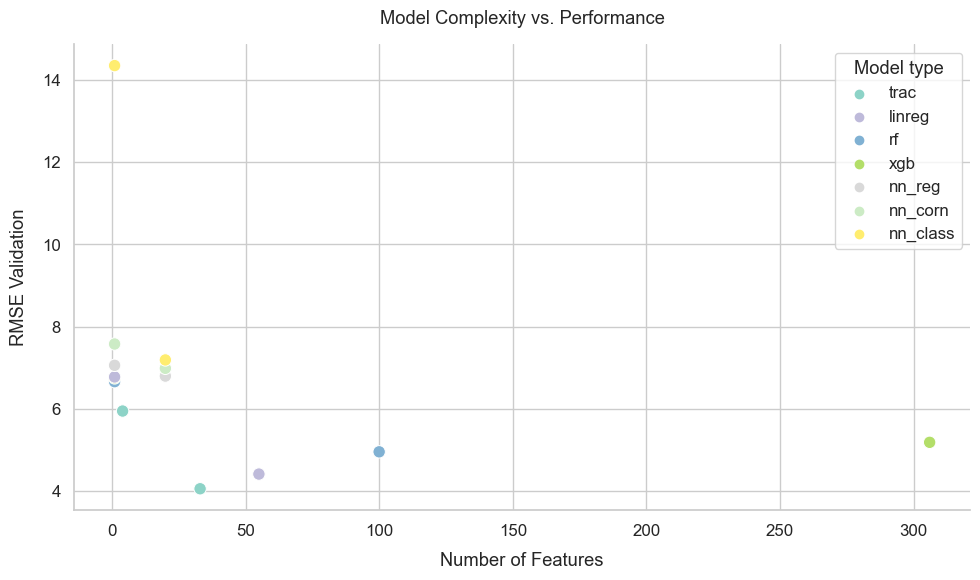

In [6]:
plot_complexity_vs_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
    static=True,  # Set to False for interactive plotly graph
)

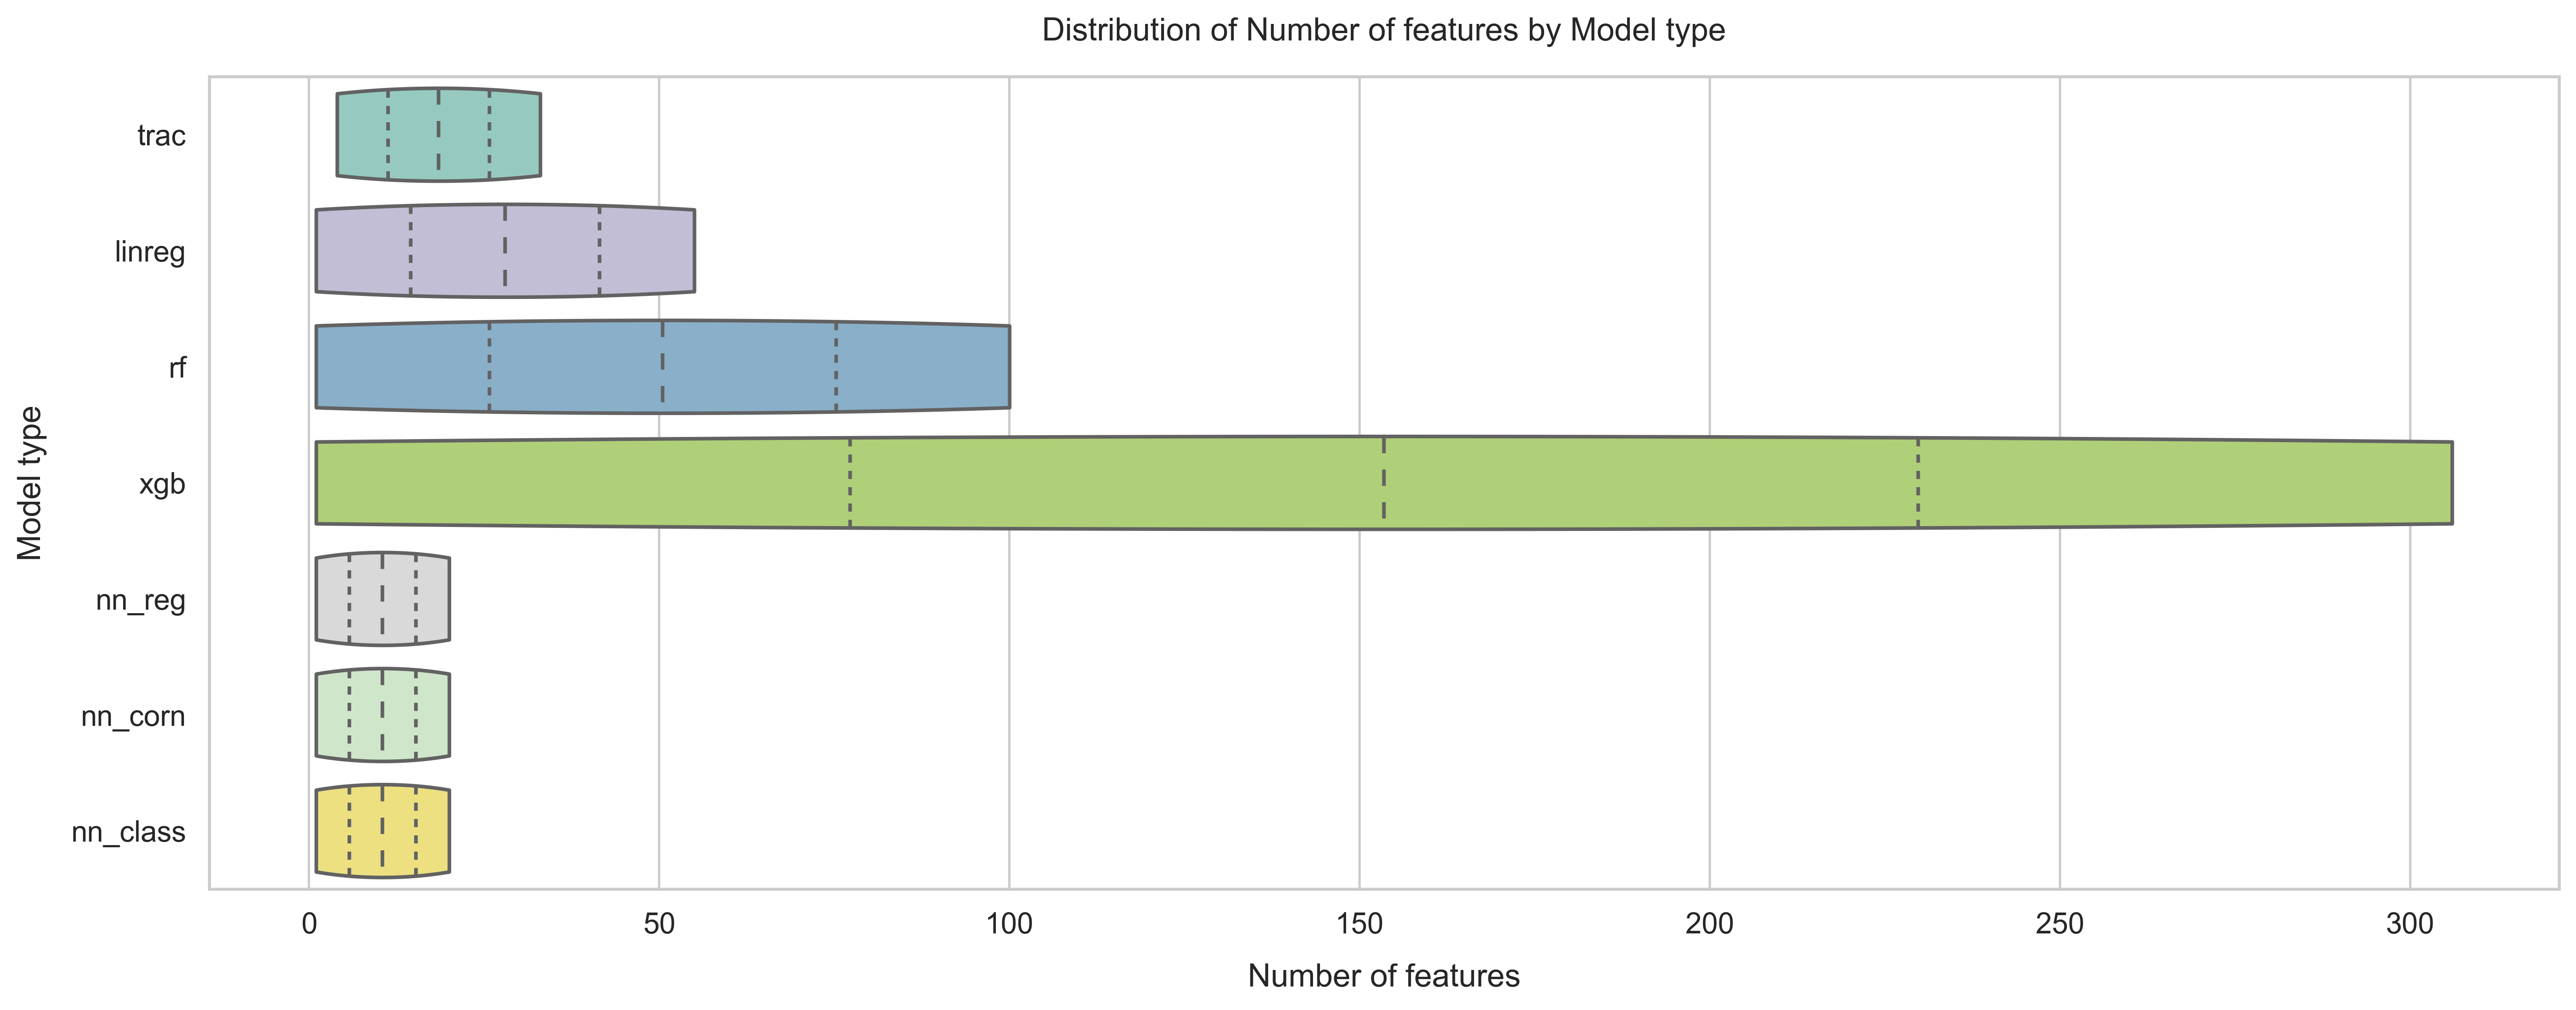

In [7]:
violinplot_metric(
    all_trials,
    metric_col="metrics.nb_features",
    metric_name="Number of features",
    group_col="params.model",
    group_name="Model type",
)

In [8]:
first_metric_col = "metrics.nb_features"
first_metric_name = "# features"
parallel_coordinates_plot(all_trials, first_metric_col, first_metric_name)

## Performance vs. feature engineering

### Effect of data transformation

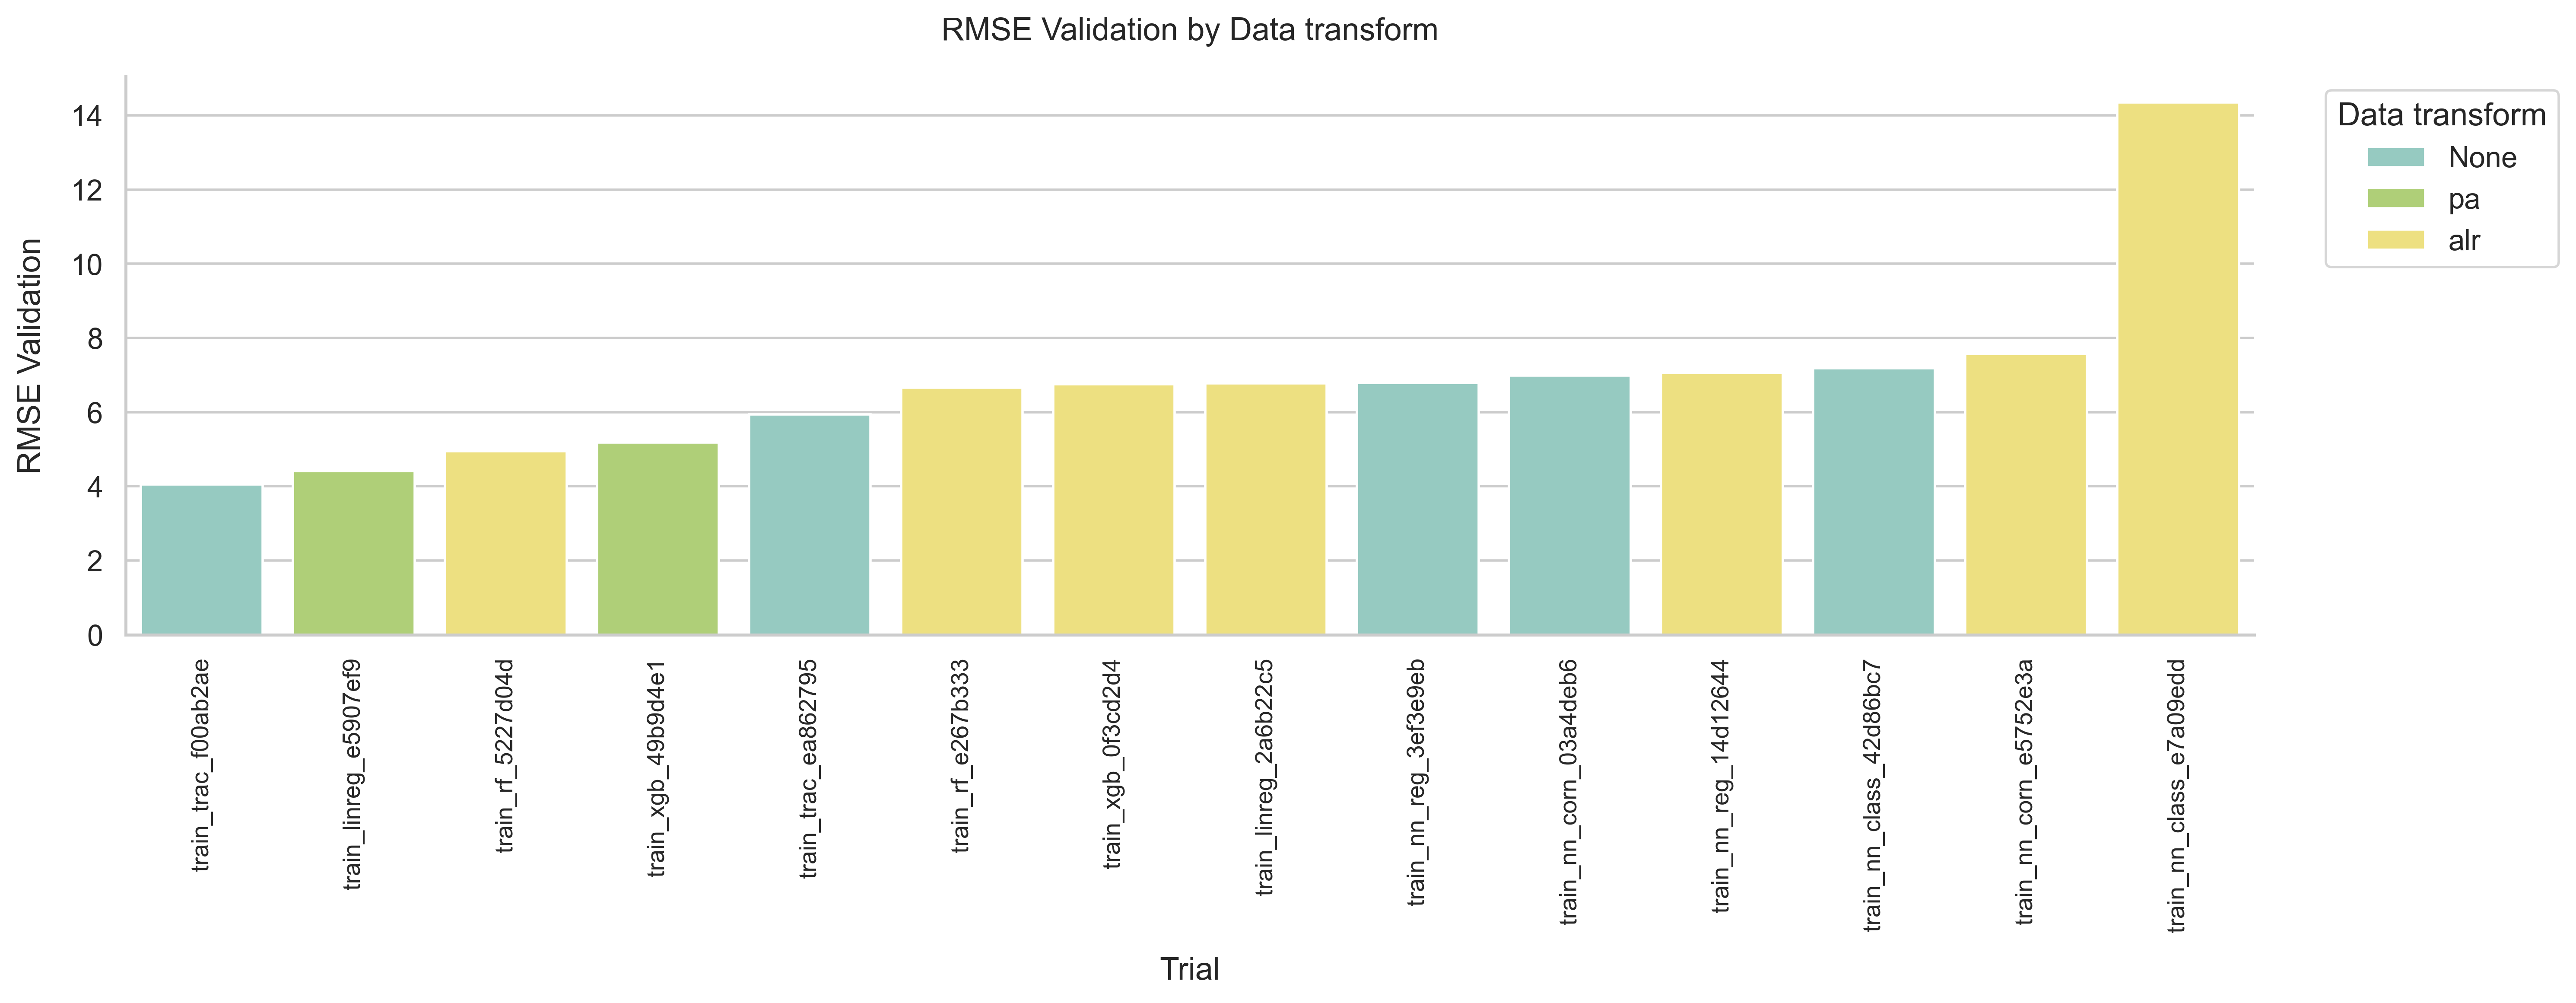

In [9]:
var = "params.data_transform"
var_name = "Data transform"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

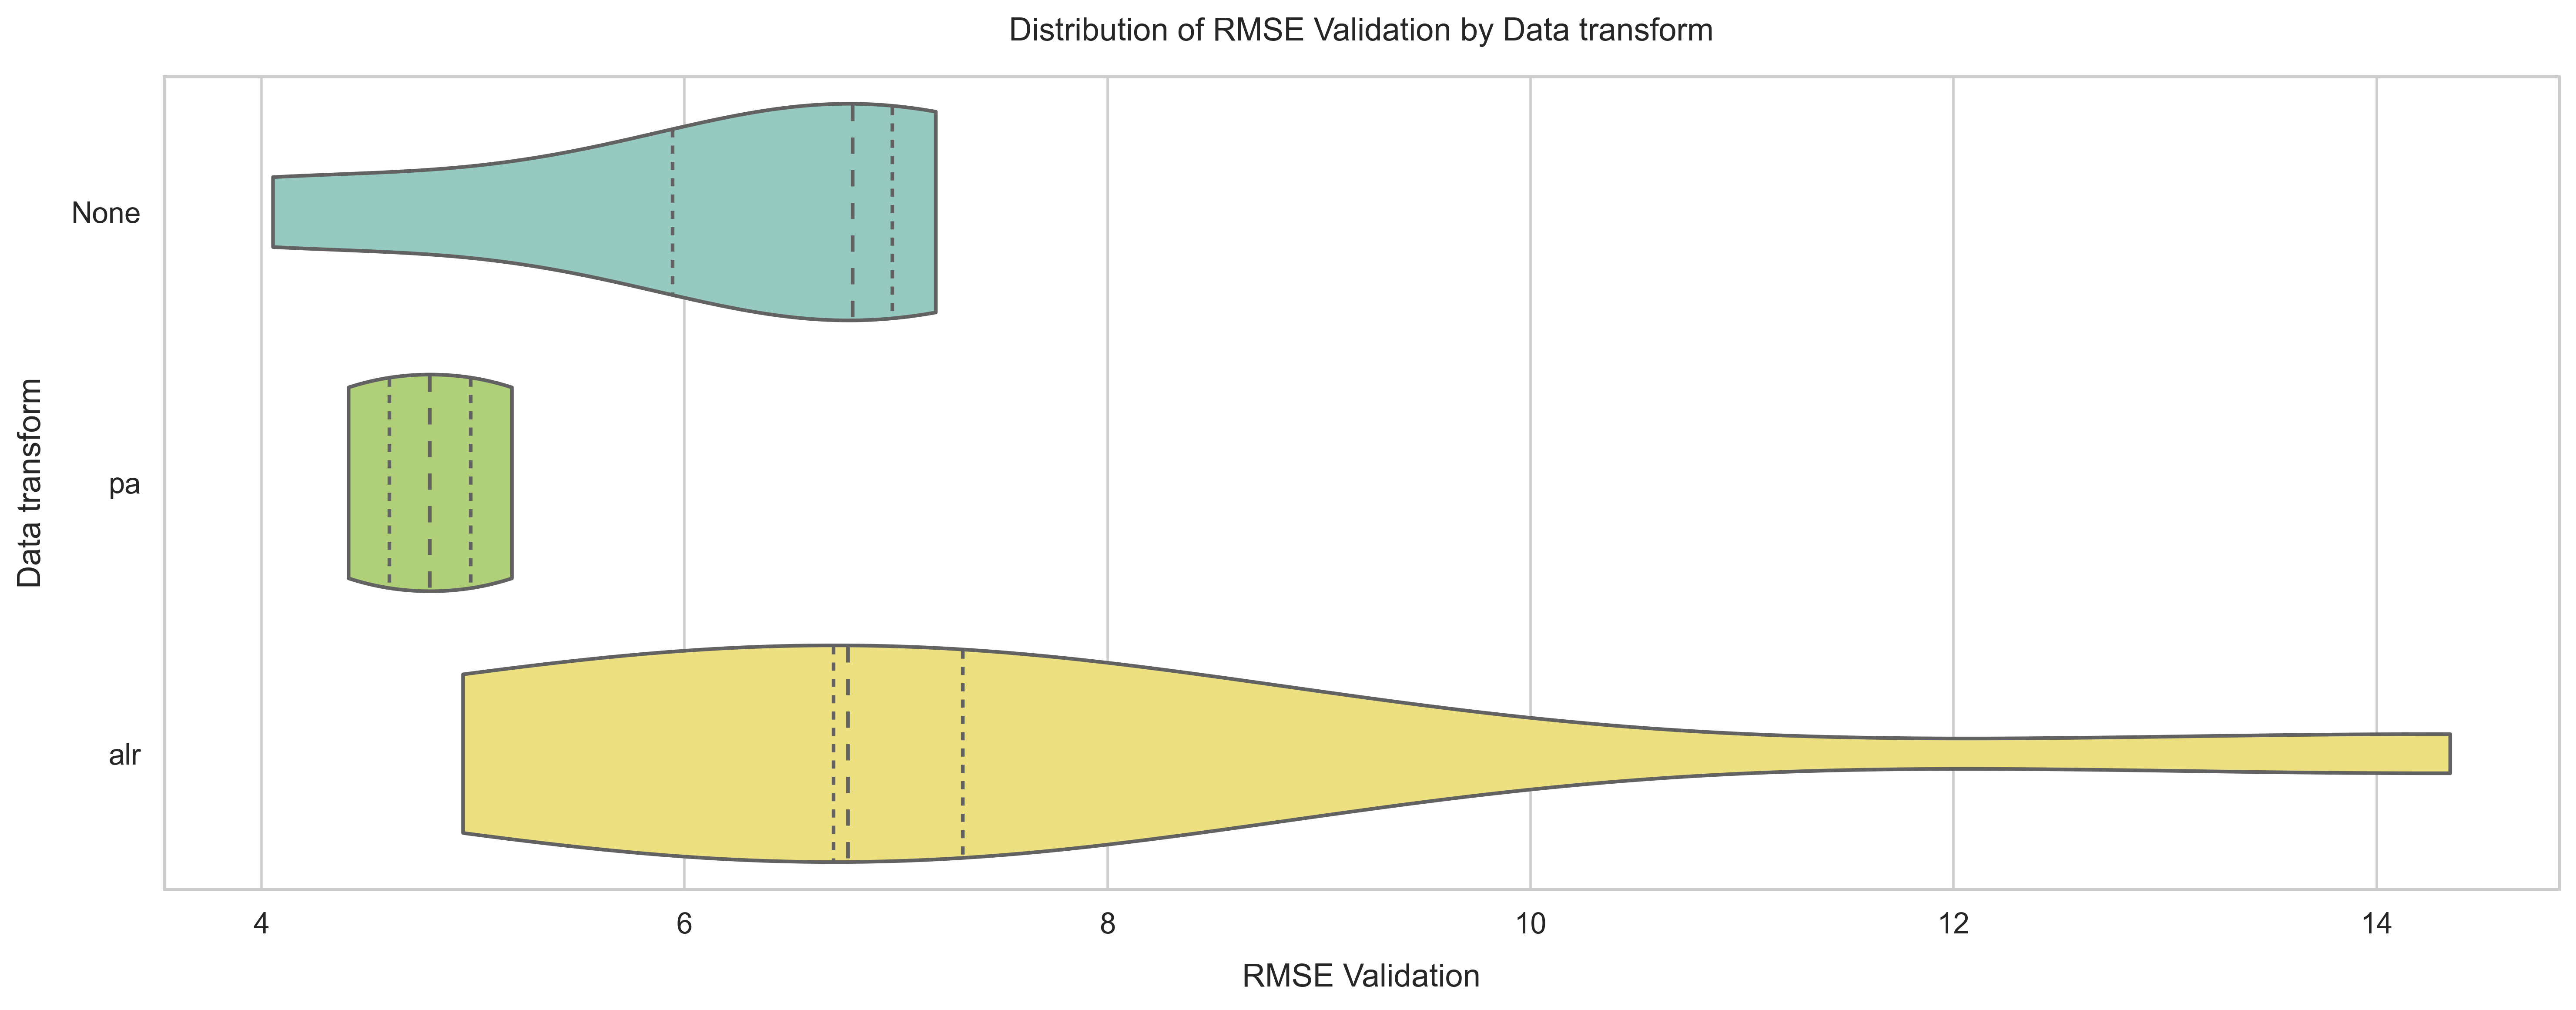

In [10]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [11]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

### Effect of data selection

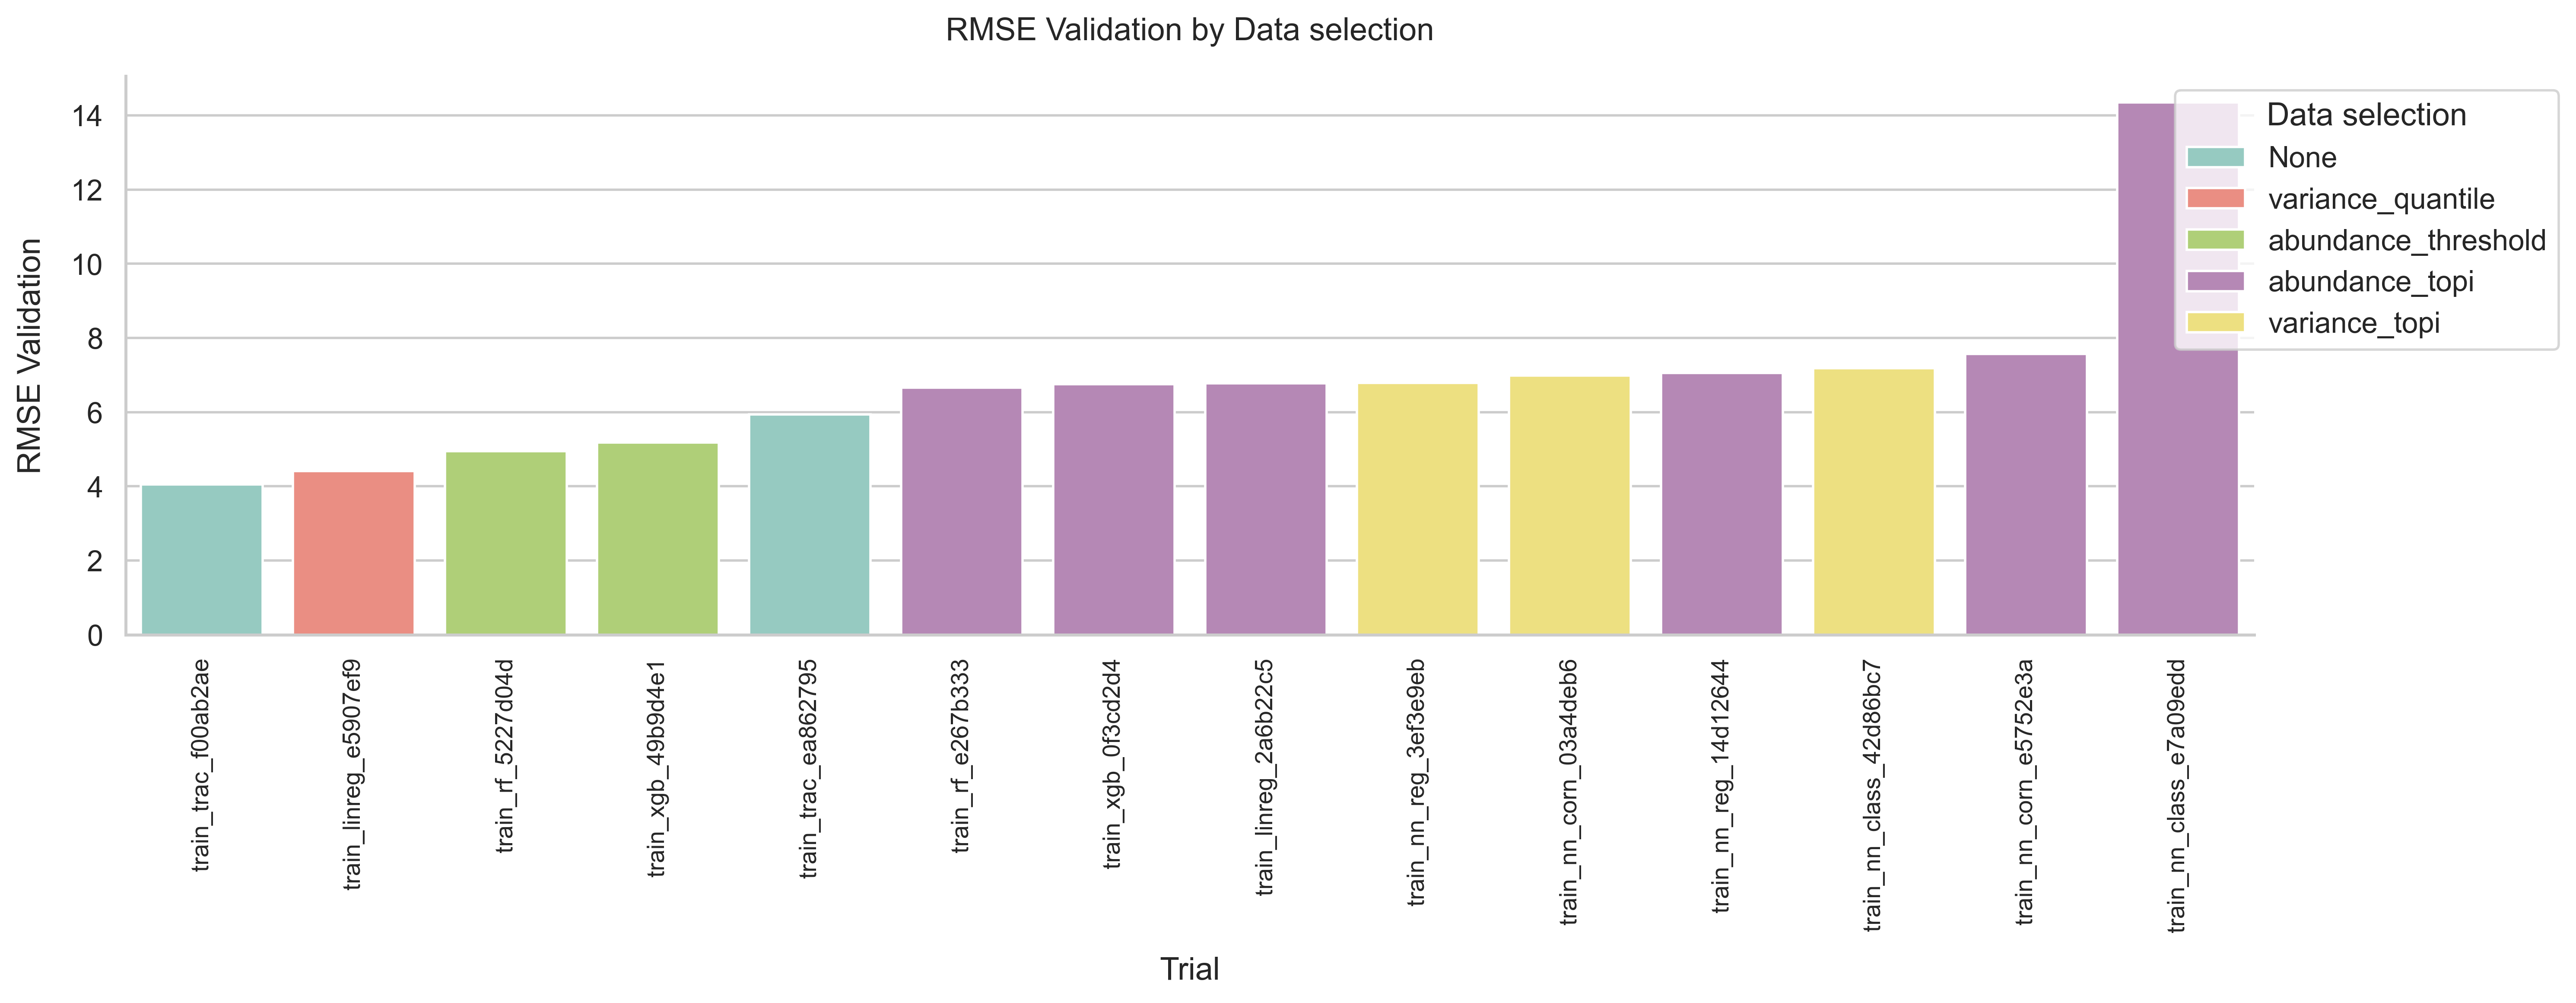

In [12]:
var = "params.data_selection"
var_name = "Data selection"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

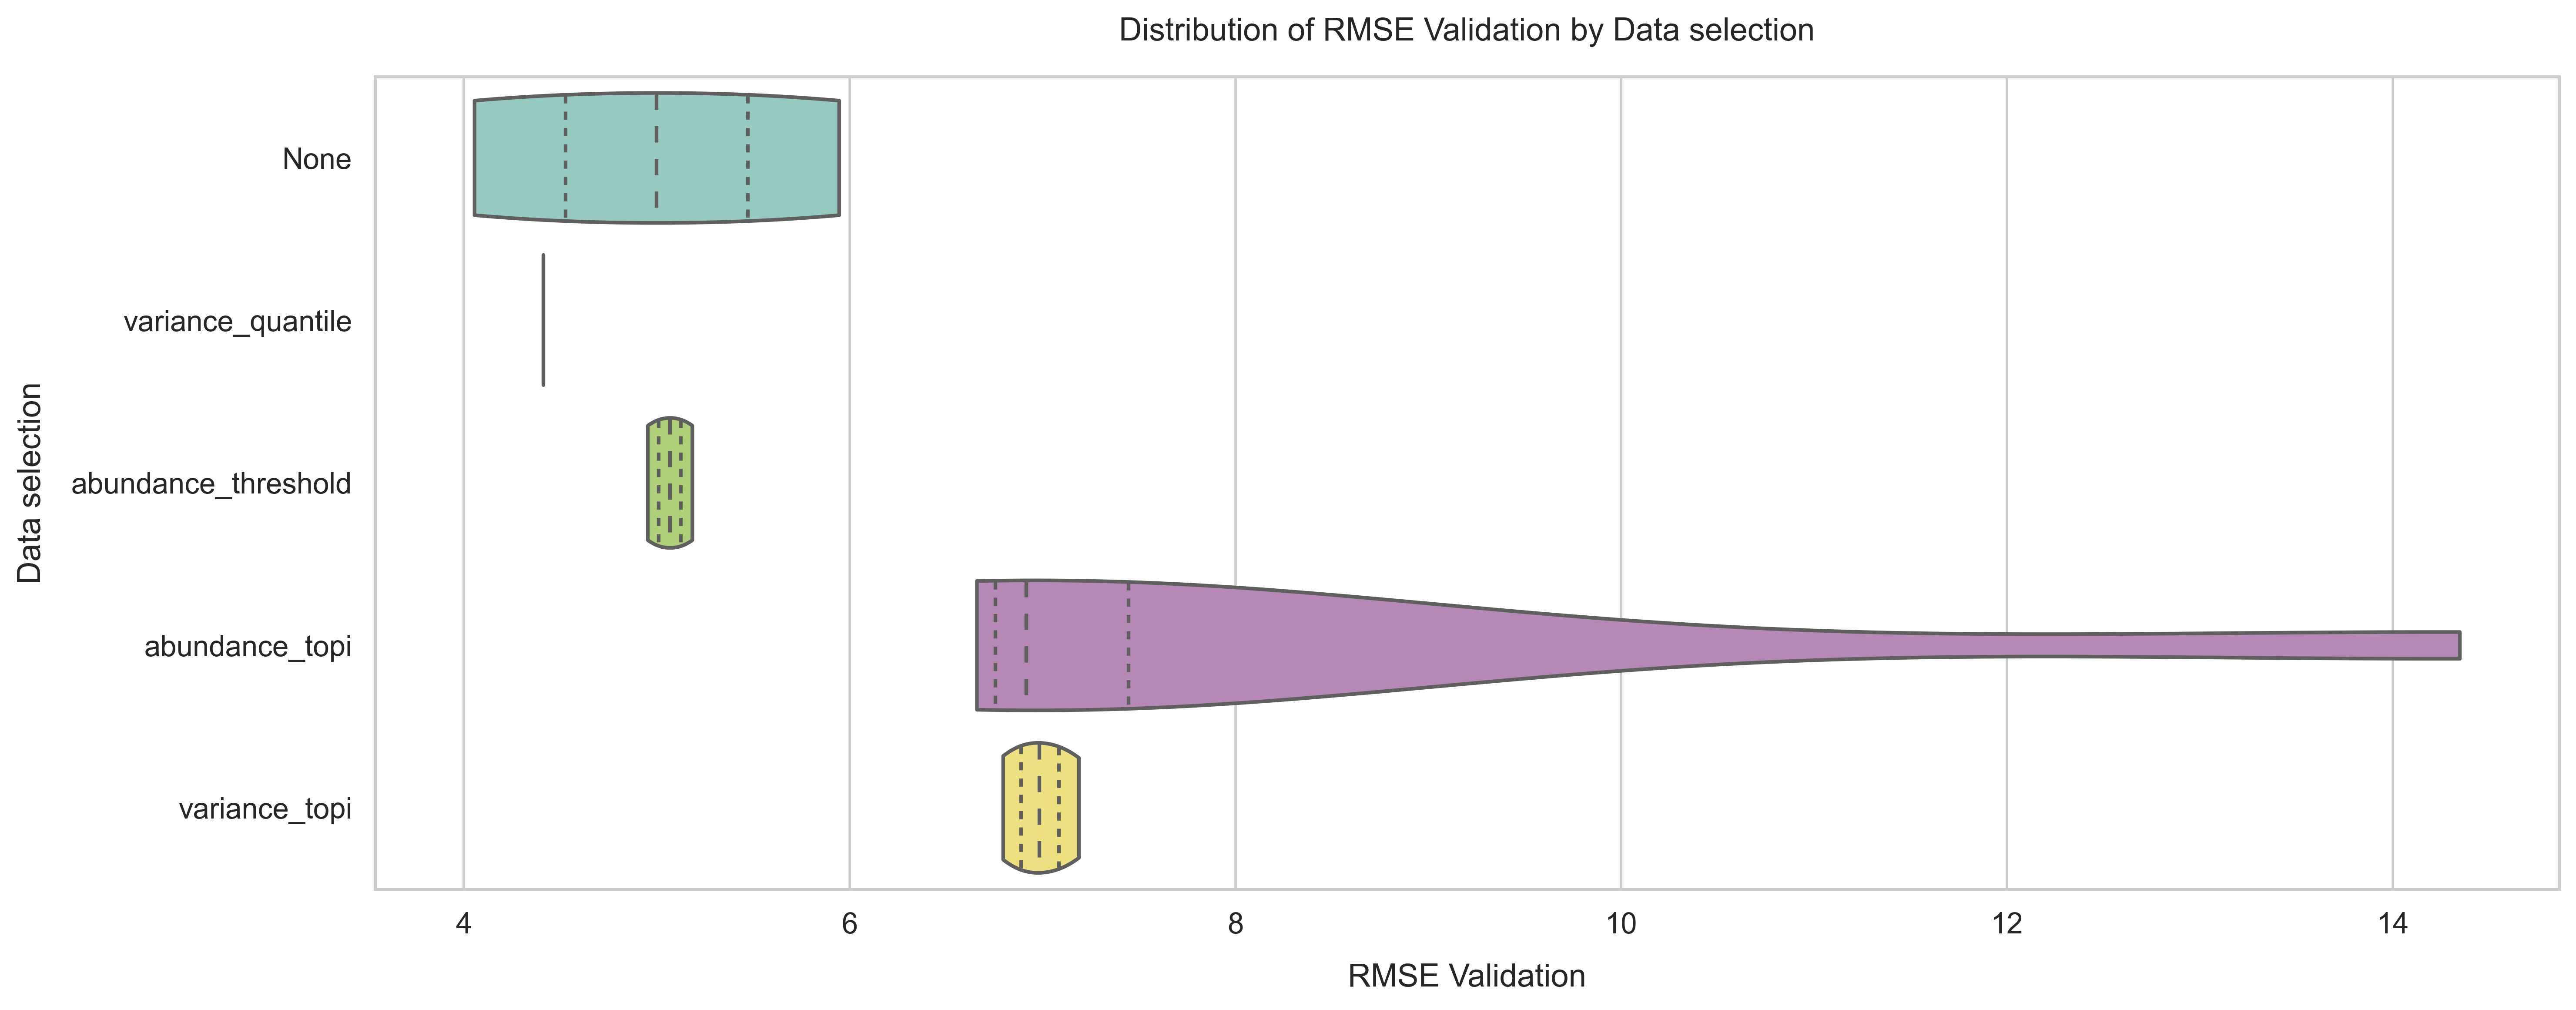

In [13]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [14]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

### Effect of data aggregation

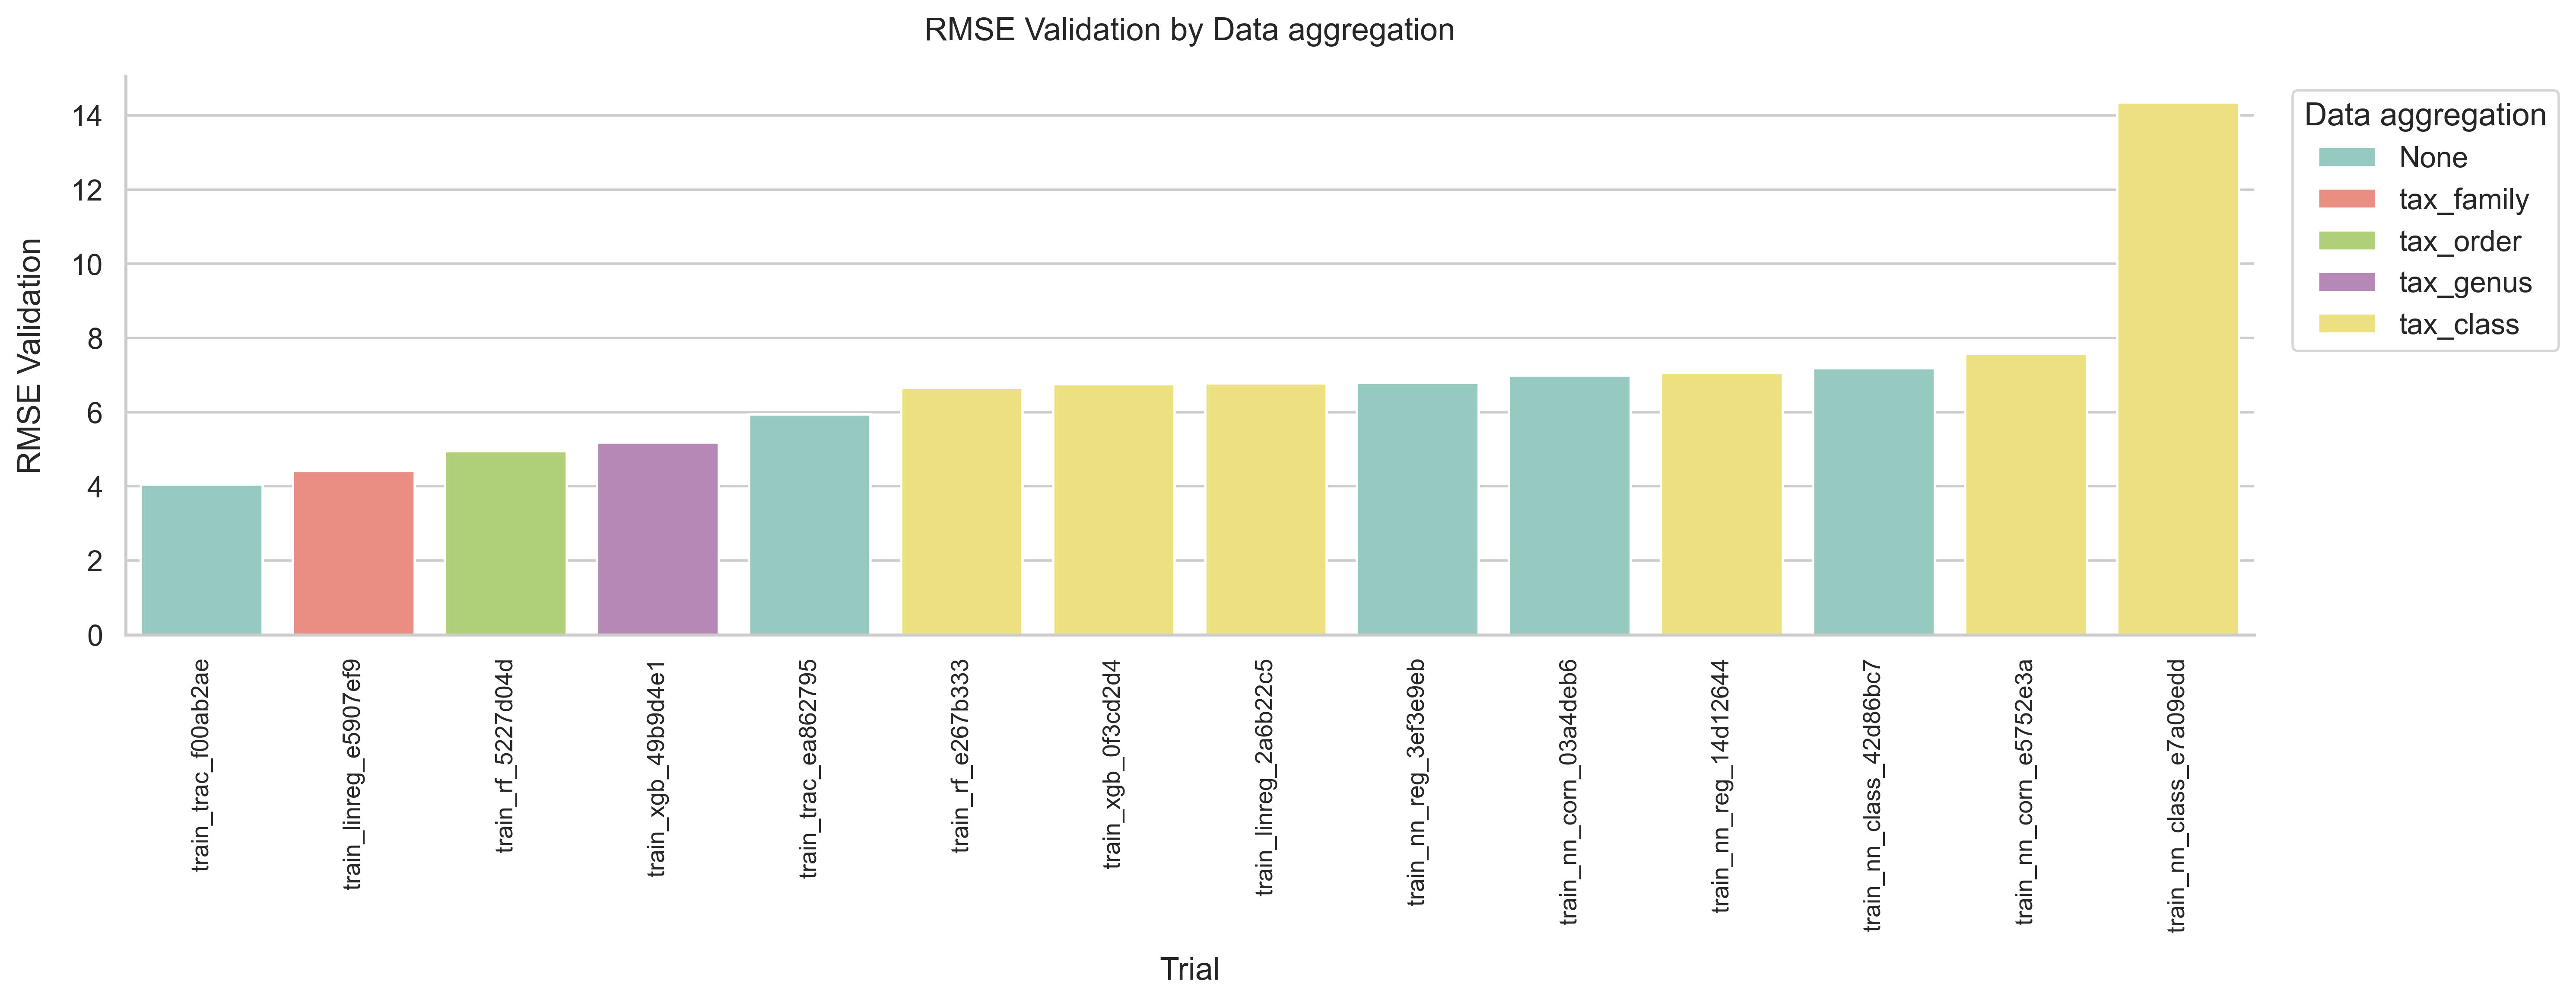

In [15]:
var = "params.data_aggregation"
var_name = "Data aggregation"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

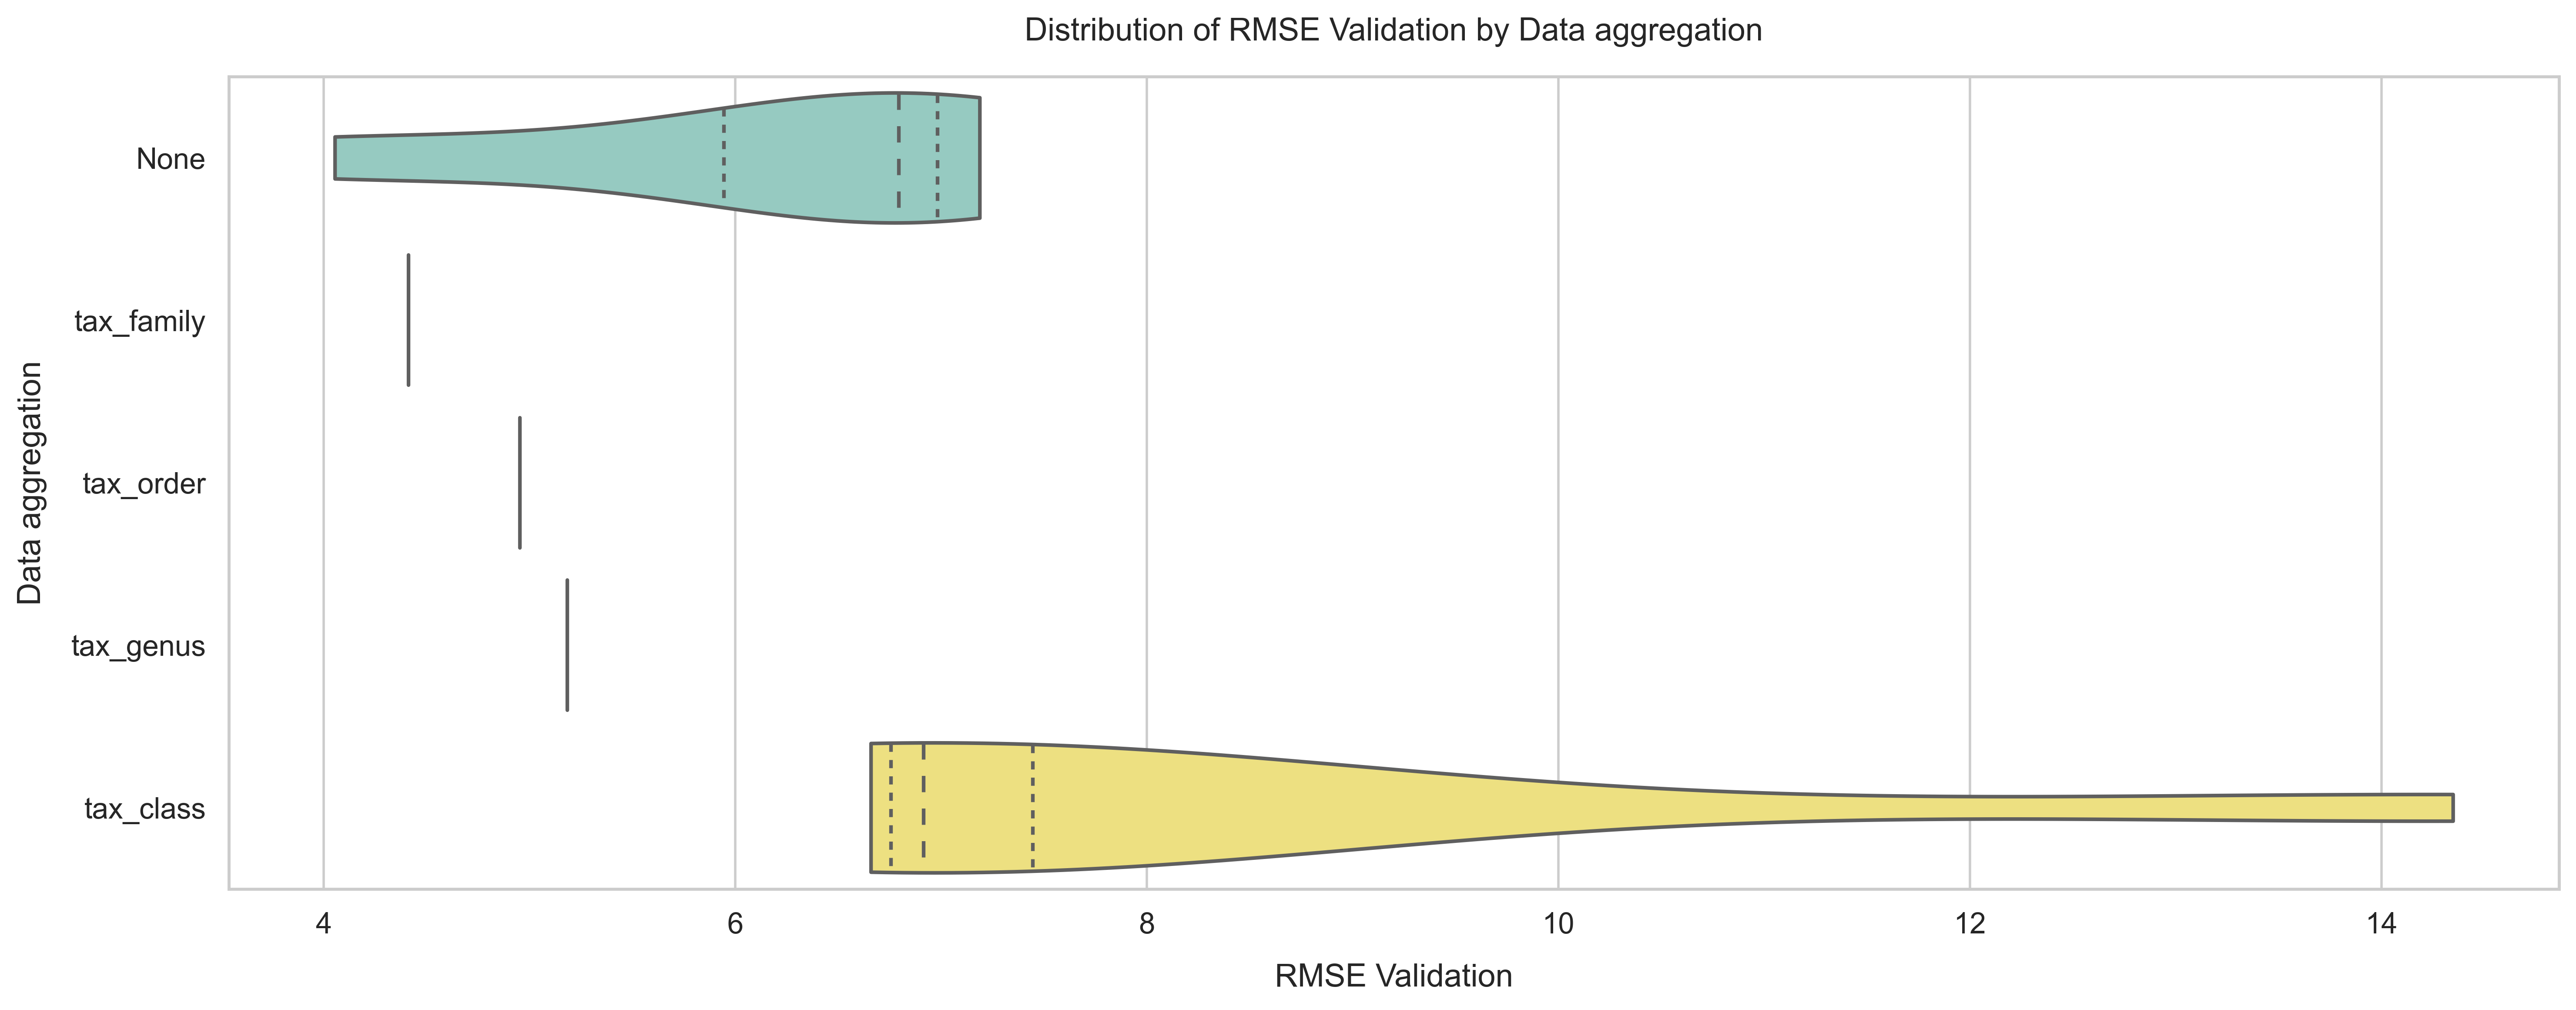

In [16]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [17]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

## Training over time

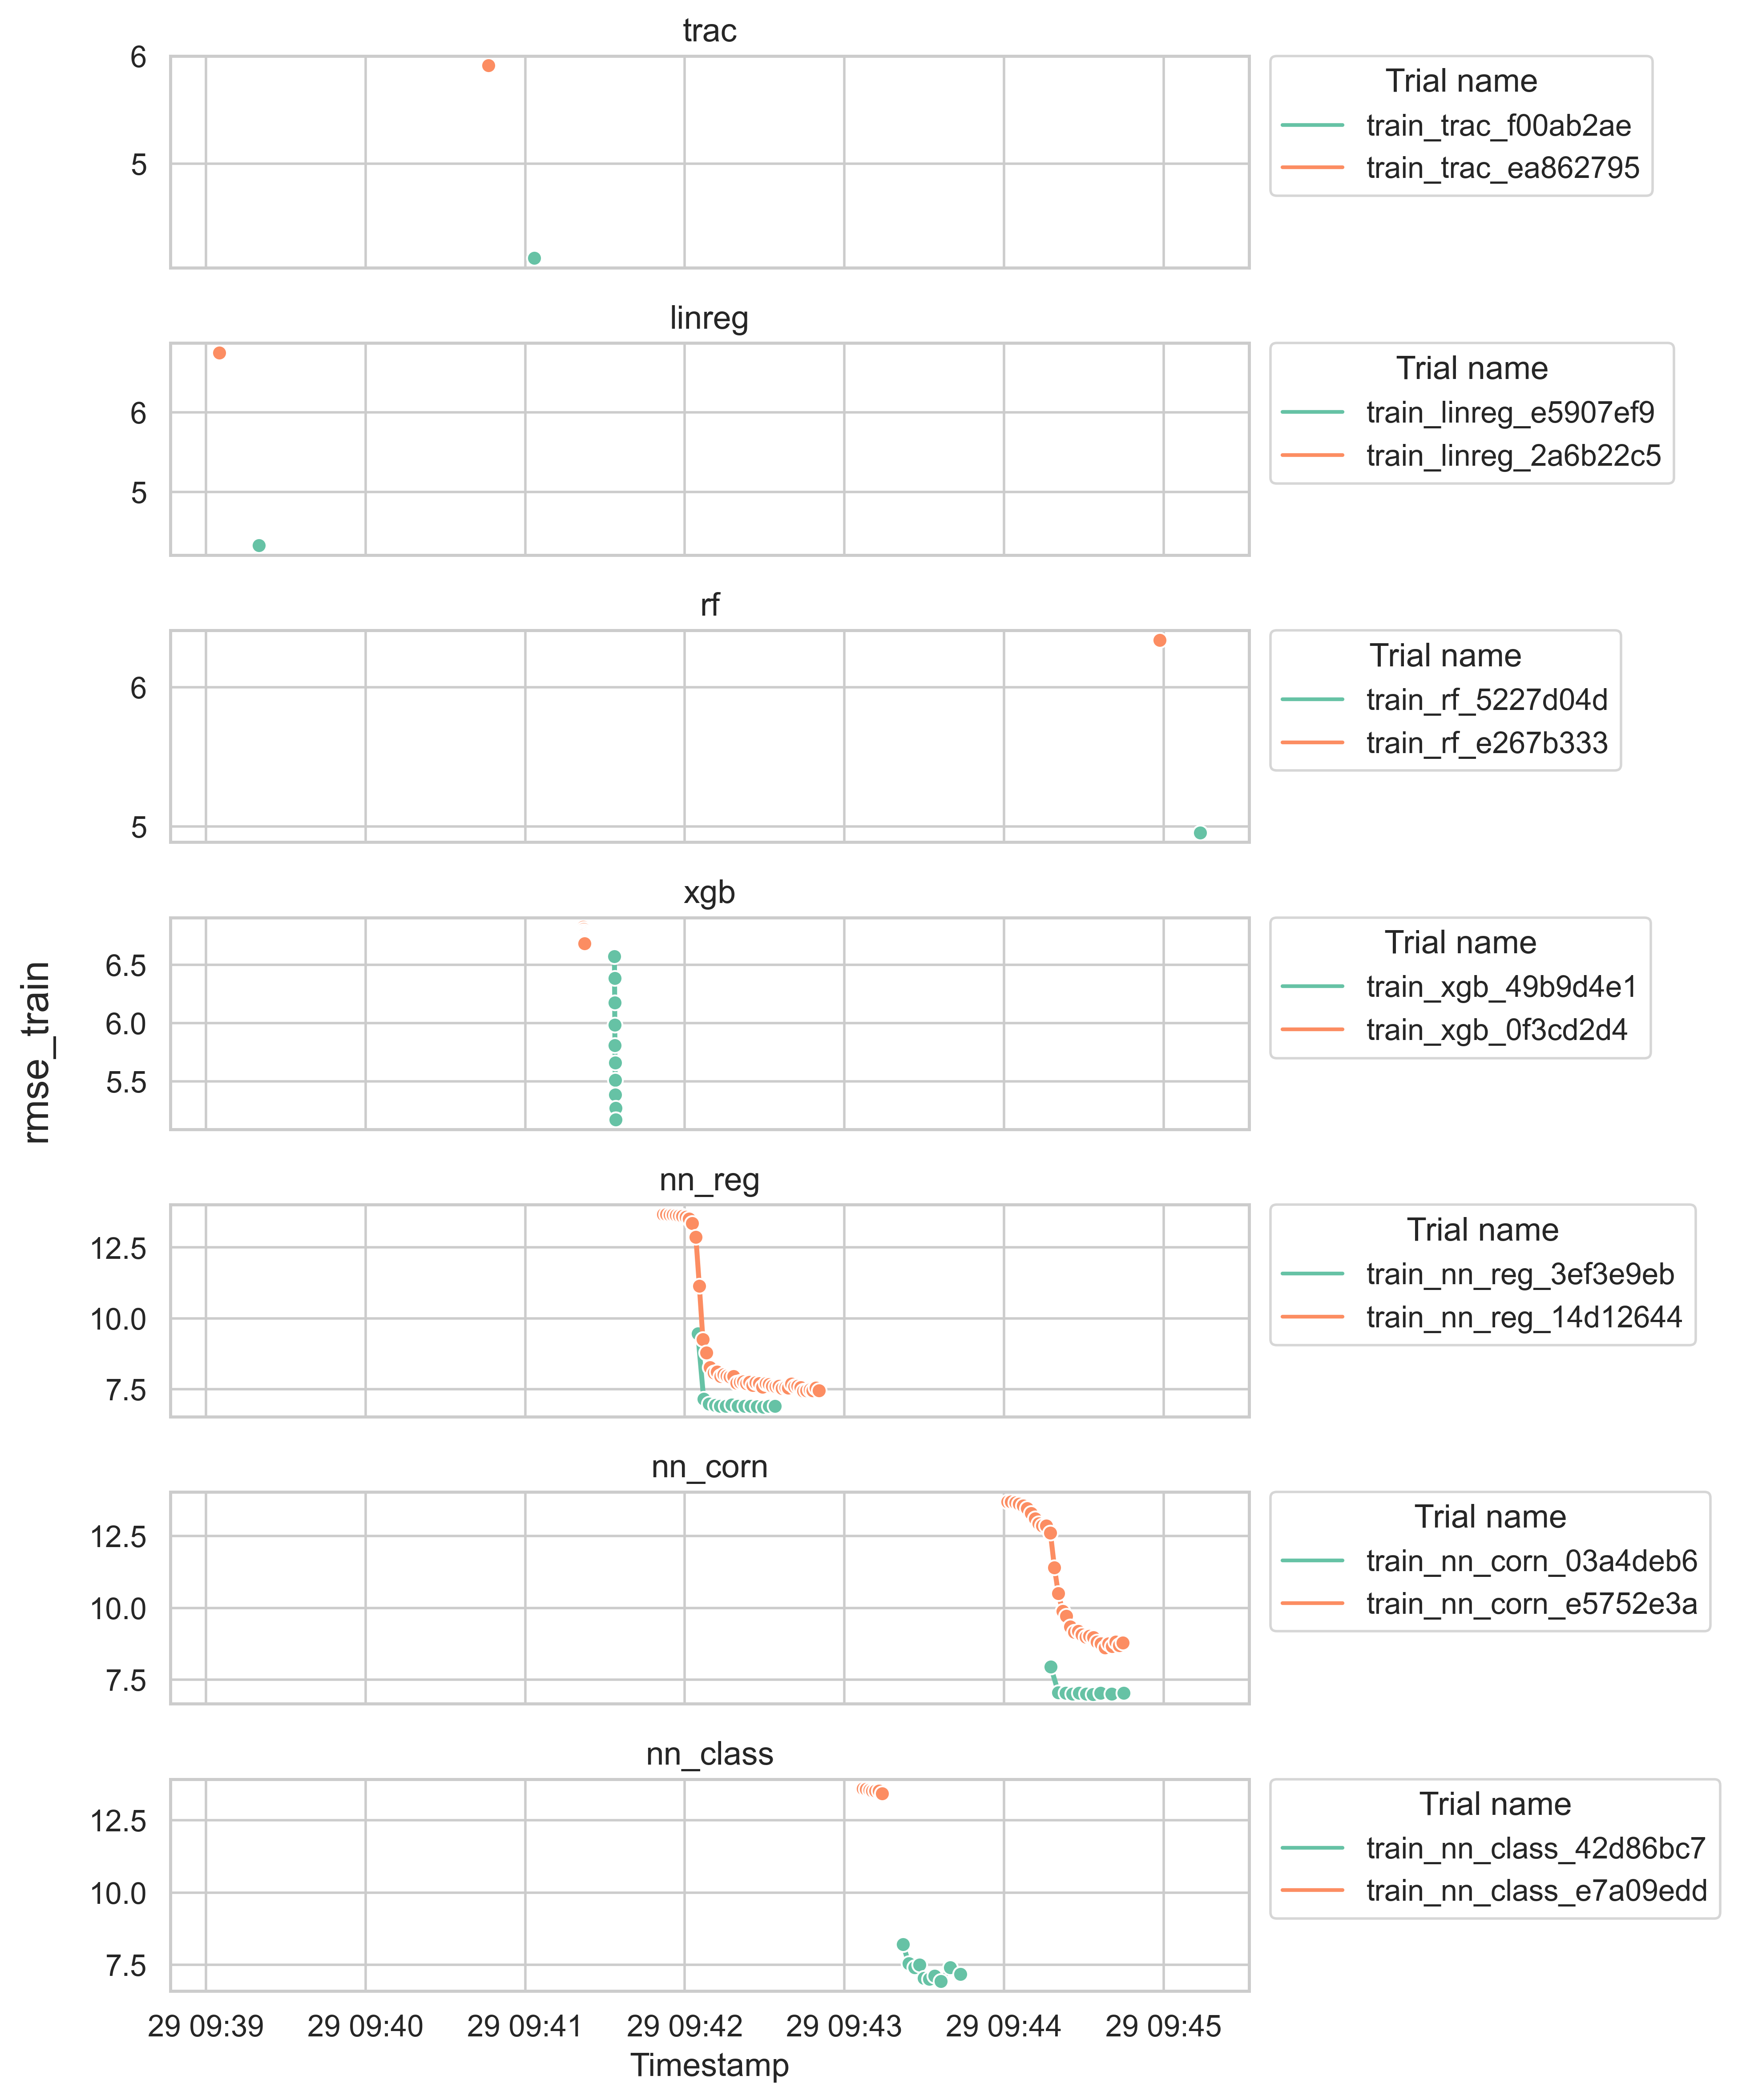

In [18]:
metric = "rmse_train"
client = mlflow.tracking.MlflowClient(tracking_uri=log_folder_location)

plot_metric_history_per_model_type(metric, client, all_trials)

* If per model type later launched trials yield smaller RMSE train then the selected search algorithm works

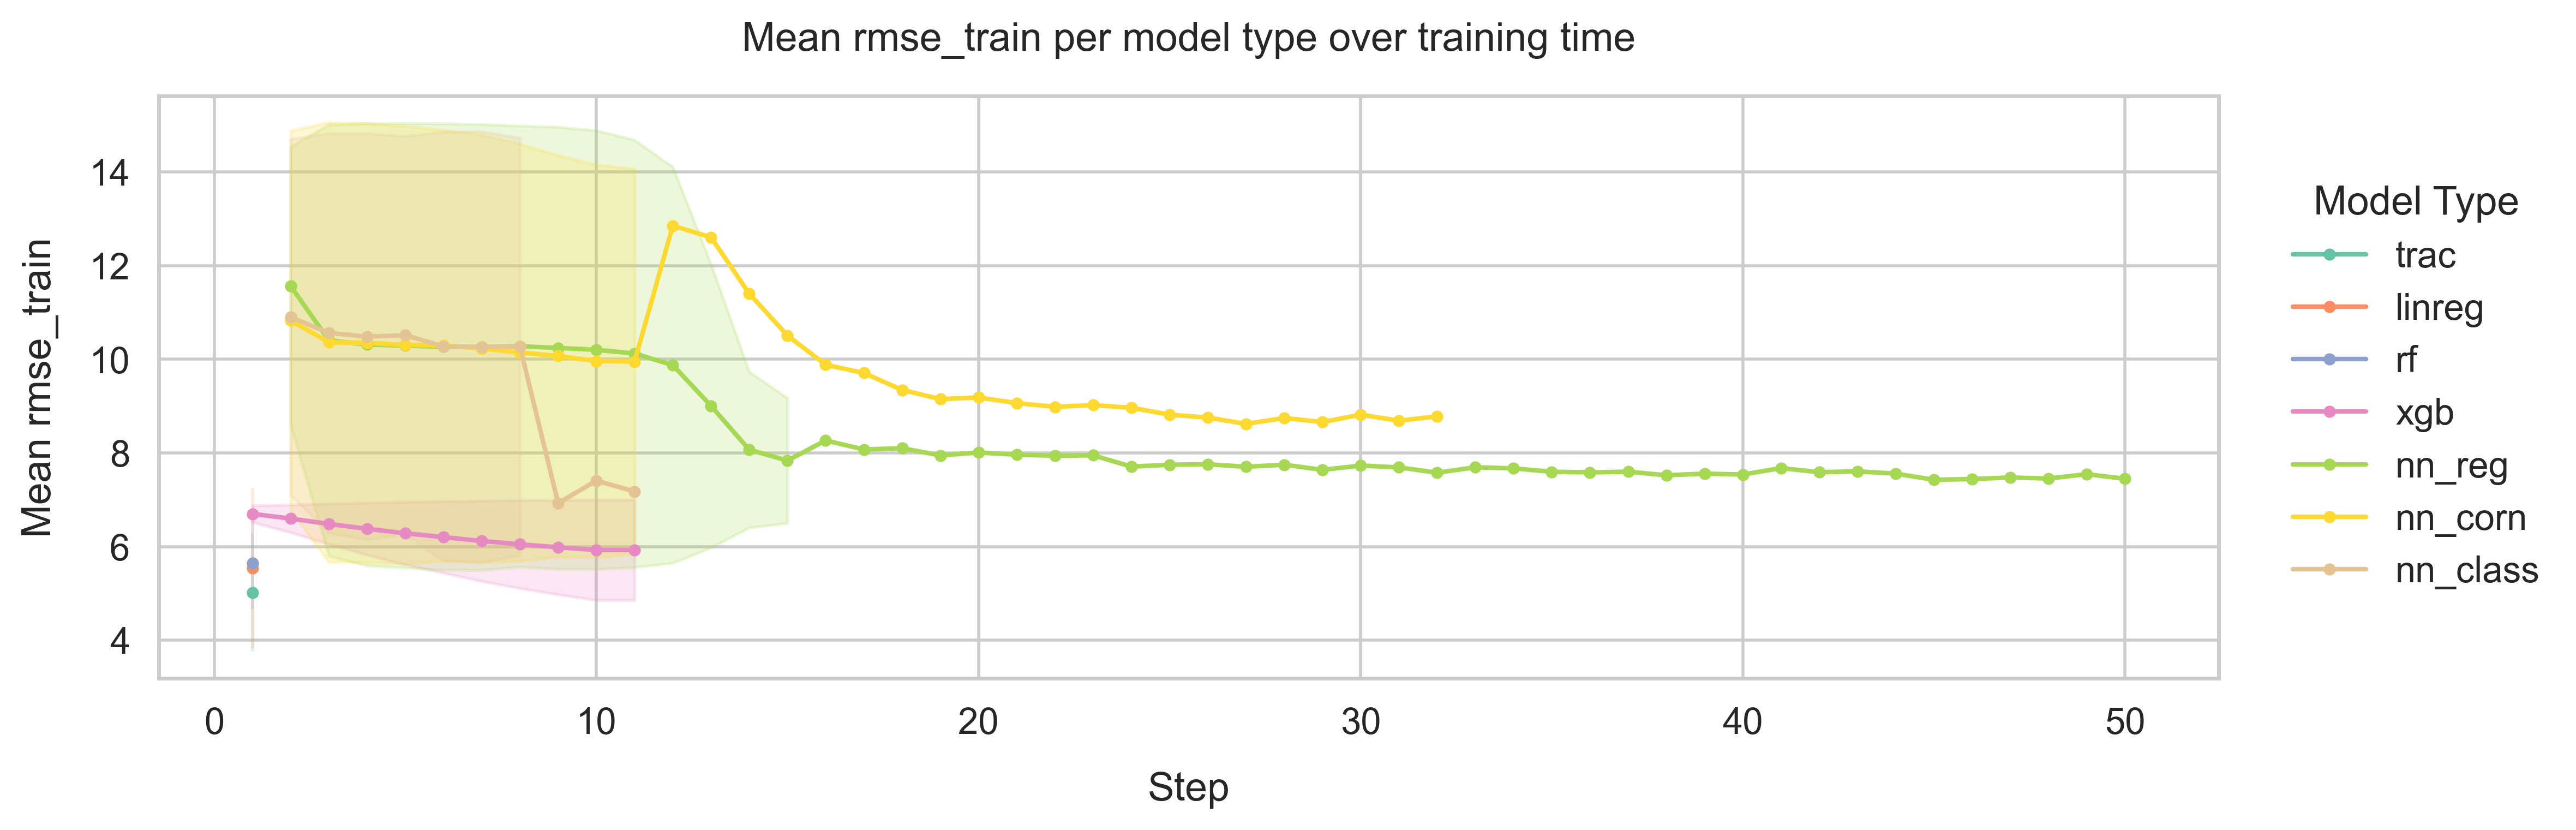

In [19]:
plot_avg_history_per_model_type("rmse_train", client, all_trials)

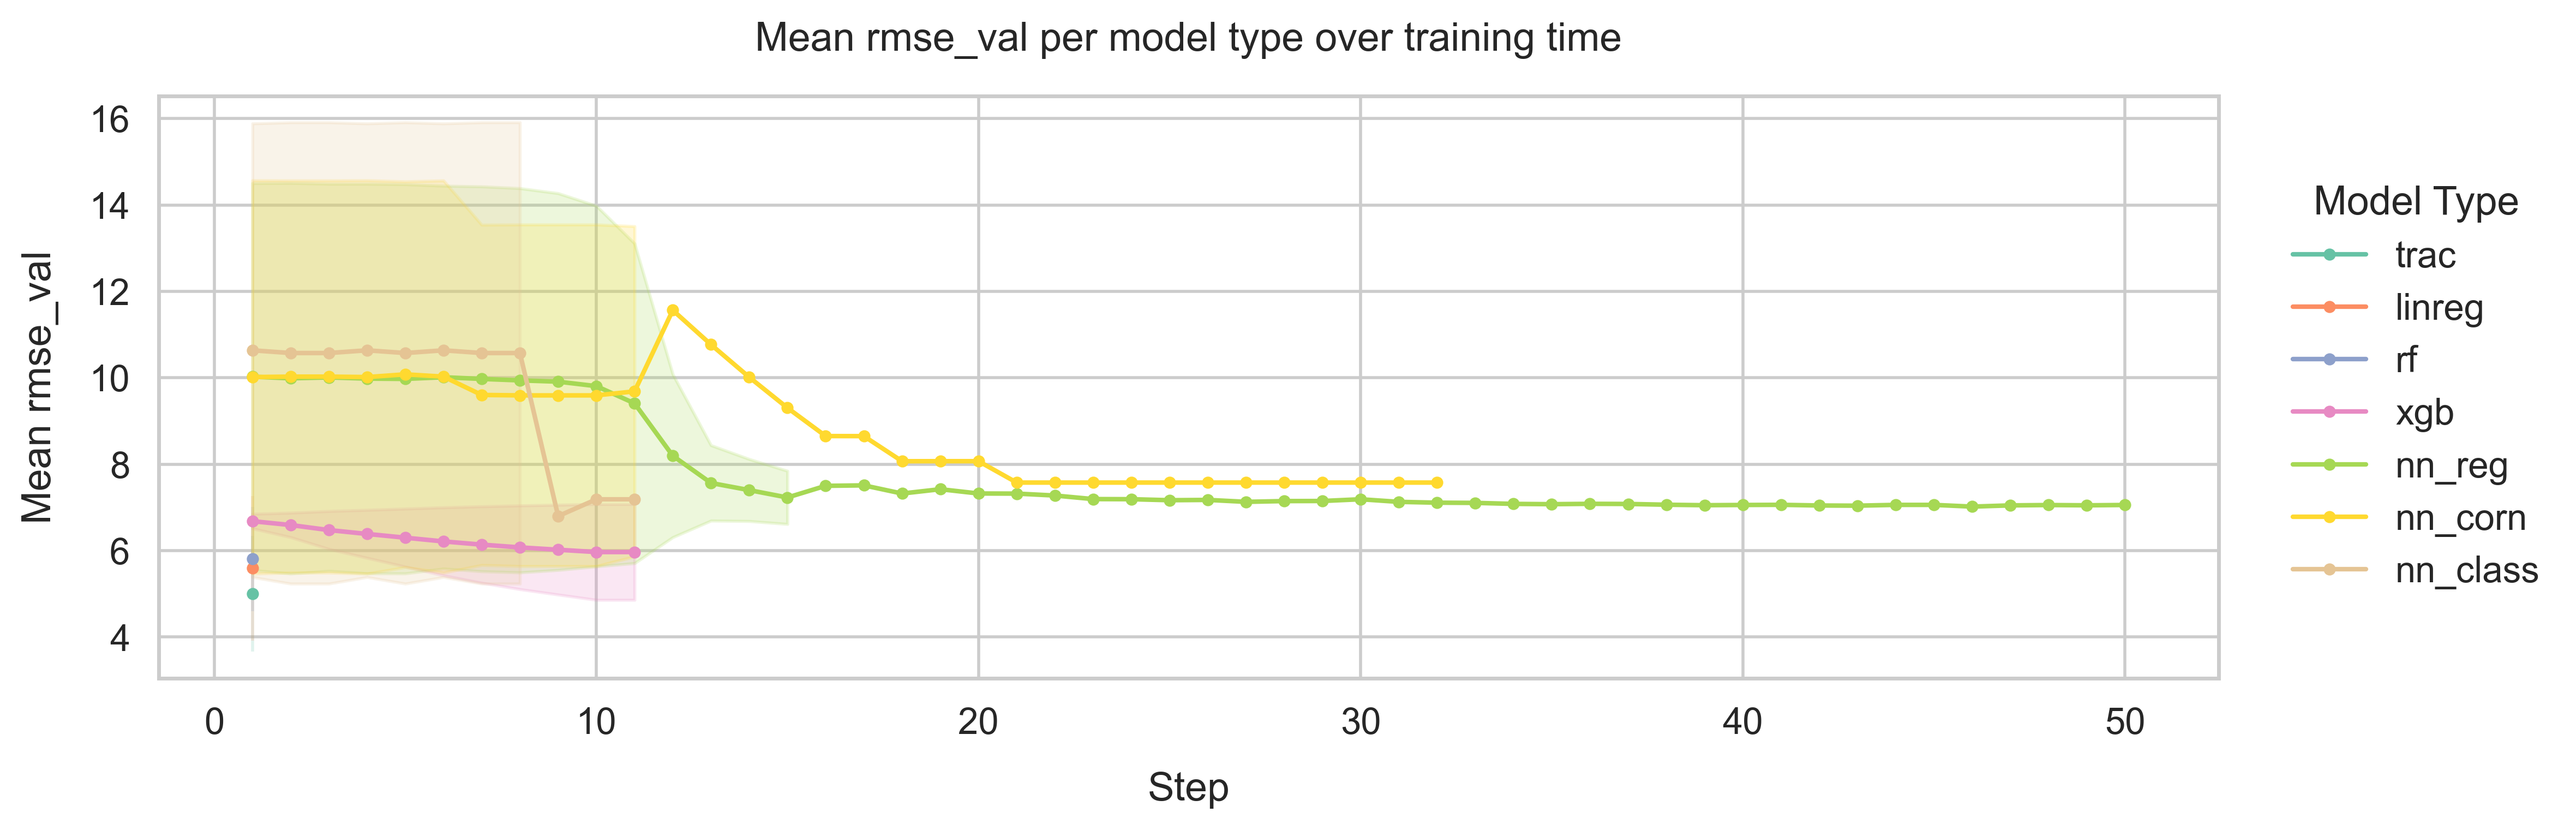

In [20]:
plot_avg_history_per_model_type("rmse_val", client, all_trials)

## Run configuration overview

In [ ]:
run_config = extract_run_config(all_trials)
run_config

run_id       experiment_id  \
0   b1384379fac748448f30faf8e9f47d4f  319241361978202692   
1   aac1c24d968b4911805d5a919bdf4f90  598165126200530347   
2   1e8b761dd7bb4320af54aa37d5087324  642892327504315657   
3   5067e381f14e4691b71a81e5b7e57234  678310356601307520   
4   96f9f1f4fd4e47bdbbc0f3442e7a0cb4  319241361978202692   
5   7f6f1f26b3794562a44a5577b2367e05  642892327504315657   
6   f15292175a3f4d3daedaeb2d913f1f38  678310356601307520   
7   d39b0e3a42264eb8889fe9ea4bea94a6  598165126200530347   
8   acf67b35e69e484d88f6e499a7bfe397  719465948627845138   
9   961dec2b33e54cbd99381a1fed9ea935  195943385562188960   
10  364aa3436af04464bb5585971865619a  719465948627845138   
11  af801a95bf034c3cb0f4ff6abf197d38  539216443016758054   
12  4a780462ae2d4f7db2f64276283f2dd9  195943385562188960   
13  a16baeb8f61b4f9faa10626d8dfffc2c  539216443016758054   

                         start_time                         end_time  \
0  2025-05-29 09:39:35.057000+00:00 2025-05-29 09:41:03.530000+00:00   
1  2025-05-29 09:39:18.632000+00:00 2025-05-29 09:39:19.885000+00:00   
2  2025-05-29 09:45:08.683000+00:00 2025-05-29 09:45:13.735000+00:00   
3  2025-05-29 09:41:32.310000+00:00 2025-05-29 09:41:34.110000+00:00   
4  2025-05-29 09:39:53.535000+00:00 2025-05-29 09:40:46.461000+00:00   
5  2025-05-29 09:44:56.967000+00:00 2025-05-29 09:44:58.604000+00:00   
6  2025-05-29 09:41:20.697000+00:00 2025-05-29 09:41:22.413000+00:00   
7  2025-05-29 09:39:03.676000+00:00 2025-05-29 09:39:05.108000+00:00   
8  2025-05-29 09:41:58.738000+00:00 2025-05-29 09:42:34.122000+00:00   
9  2025-05-29 09:44:09.430000+00:00 2025-05-29 09:44:45.123000+00:00   
10 2025-05-29 09:41:45.871000+00:00 2025-05-29 09:42:50.535000+00:00   
11 2025-05-29 09:43:15.343000+00:00 2025-05-29 09:43:43.780000+00:00   
12 2025-05-29 09:43:56.182000+00:00 2025-05-29 09:44:44.827000+00:00   
13 2025-05-29 09:43:02.012000+00:00 2025-05-29 09:43:14.265000+00:00   

    metrics.config/lambda  metrics.time_since_restore  metrics.time_total_s  \
0                0.002901                   88.283861             88.283861   
1                     NaN                    1.167104              1.167104   
2                     NaN                    4.955909              4.955909   
3                     NaN                    1.253038              1.253038   
4                0.166016                   52.528740             52.528740   
5                     NaN                    1.532078              1.532078   
6                     NaN                    1.158651              1.158651   
7                     NaN                    1.339684              1.339684   
8                     NaN                   33.580041             33.580041   
9                     NaN                   34.283028             34.283028   
10                    NaN                   59.651500             59.651500   
11                    NaN                   27.274282             27.274282   
12                    NaN                   45.359601             45.359601   
13                    NaN                   11.359008             11.359008   

    metrics.pid  metrics.timestamp  metrics.nb_features  ...  \
0       10797.0       1.748512e+09                 33.0  ...   
1       10757.0       1.748512e+09                 55.0  ...   
2       11951.0       1.748512e+09                100.0  ...   
3       11020.0       1.748512e+09                306.0  ...   
4       10818.0       1.748512e+09                  4.0  ...   
5       11907.0       1.748512e+09                  1.0  ...   
6       10996.0       1.748512e+09                  1.0  ...   
7       10737.0       1.748512e+09                  1.0  ...   
8       11080.0       1.748512e+09                 20.0  ...   
9       11651.0       1.748512e+09                 20.0  ...   
10      11047.0       1.748512e+09                  1.0  ...   
11      11471.0       1.748512e+09                 20.0  ...   
12      11615.0       1.748512